# Difference between regression and classification

## Load data

In [2]:
import pandas as pd

path = '../../../data/stock/output/c_vs_r.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Volume,T.Change,T.Direction
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.741238,23753600,-0.016006,DOWN
2020-01-03,58.775002,59.457500,58.525002,58.785030,20538400,0.004193,UP
2020-01-06,58.080002,59.317501,57.817501,59.031540,26263600,0.012107,UP
2020-01-07,59.549999,60.442501,59.097500,59.746223,31485600,0.001876,UP
2020-01-08,59.939999,60.509998,59.537498,59.858280,27710800,0.010983,UP
...,...,...,...,...,...,...,...
2024-05-02,844.489990,862.369995,832.000000,858.169983,37789800,0.034632,UP
2024-05-03,877.890015,892.809998,870.400024,887.890015,39834100,0.037741,UP
2024-05-06,893.900024,922.200012,890.549988,921.400024,37620300,-0.017213,DOWN


## Feature selection

In [3]:
y_categorical = df['T.Direction']
y_numerical = df['T.Change']

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]

## K Nearest Neighbors

### Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y_categorical)

KNeighborsClassifier()

In [5]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [6]:
model.score(X, y_categorical)

0.6858447488584475

### Regressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X, y_numerical)

KNeighborsRegressor()

In [8]:
model.score(X, y_numerical)

0.17192536191342844

## Decision Tree

### Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y_categorical)

DecisionTreeClassifier()

In [14]:
model.score(X, y_categorical)

1.0

[Text(0.22002046331396244, 0.9913793103448276, 'x[3] <= 61.205\ngini = 0.496\nsamples = 1095\nvalue = [496, 599]'),
 Text(0.029556650246305417, 0.9741379310344828, 'x[0] <= 50.959\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.12478855678013392, 0.9827586206896552, 'True  '),
 Text(0.013136288998357963, 0.9568965517241379, 'x[0] <= 50.126\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.006568144499178982, 0.9396551724137931, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.019704433497536946, 0.9396551724137931, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.04597701149425287, 0.9568965517241379, 'x[4] <= 24632400.0\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.03284072249589491, 0.9396551724137931, 'x[0] <= 59.231\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.026272577996715927, 0.9224137931034483, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03940886699507389, 0.9224137931034483, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0591133

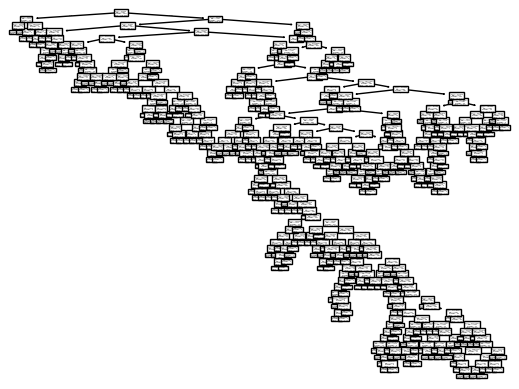

In [15]:
from sklearn.tree import plot_tree

plot_tree(model)

## Train test split

- 100 preguntas de un examen que vas a hacer el miercoles que viene
- como estudias? como calibras tu nivel de cara a responder preguntas en el examen real?

---

- estudias 100 preguntas hoy `model.fit(X=preguntas, y=respuestas)`
- mañana examen de mentira con las mismas 100 preguntas `model.score(X=preguntas, y=respuestas)`
- 100%

---

- llega el miercoles: examen - 40%
- `model.predict(X=preguntas_nuevas)`

---

- estudias 70 preguntas
- 30 para hacer el examen de mentira `model.score()` 40%
- 

In [17]:
from sklearn.model_selection import train_test_split

In [25]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y_categorical, test_size=0.3, random_state=42)

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
model.score(X_train, y_train)

1.0

In [33]:
model.score(X_test, y_test)

0.5349544072948328

In [27]:
X_train

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-13,145.899994,153.750000,144.649994,151.481857,52191800
2024-02-22,750.250000,785.750000,742.200012,785.343140,86510000
2020-12-28,130.625000,130.625000,127.632500,128.703827,21256400
2022-10-20,121.129997,127.690002,121.050003,121.849030,65239800
2021-11-24,314.609985,328.549988,309.279999,326.234680,43516200
...,...,...,...,...,...
2021-04-26,151.850006,154.789993,151.250000,154.478012,19779600
2021-11-05,301.869995,314.000000,294.100006,297.059845,85126000
2020-06-25,93.557503,95.050003,91.822502,94.625870,37607200


In [28]:
X_test

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-11,259.160004,261.519989,237.729996,239.148911,60547200
2020-07-22,103.675003,106.025002,102.915001,104.085983,36729200
2020-05-08,76.937500,78.187500,76.597504,77.863800,33921600
2023-05-05,278.260010,287.549988,277.309998,286.708038,36101400
2023-11-30,480.239990,481.100006,464.220001,467.636963,52624700
...,...,...,...,...,...
2020-12-07,136.012497,137.312500,135.000000,135.755188,22324400
2021-09-08,225.130005,226.100006,219.770004,223.044525,25443400
2022-05-05,198.669998,199.250000,185.000000,188.203705,62633100


In [18]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

### Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, y_numerical)

DecisionTreeRegressor()

In [12]:
model.score(X, y_numerical)

1.0